# Laboratorio 2

- Jorge Caballeros 20009
- Lucía Alejandra Guzmán 20262

## Redes neuronales con diferentes numeros de capas y neuronas

Importando librerias necesarias


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv("data.csv")

# Filter the relevant columns
columns = ['production_date', 'genres', 'runtime_minutes', 'Production budget $', 'Worldwide gross $']
filtered_data = data[columns]

# Display the first few rows of the filtered data
filtered_data.head()


,production_date,genres,runtime_minutes,Production budget $,Worldwide gross $
0,2022-12-09,"Action,Adventure,Fantasy",192.0,460000000,2265935552
1,2019-04-23,"Action,Adventure,Drama",181.0,400000000,2794731755
2,2011-05-20,"Action,Adventure,Fantasy",137.0,379000000,1045713802
3,2015-04-22,"Action,Adventure,Sci-Fi",141.0,365000000,1395316979
4,2018-04-25,"Action,Adventure,Sci-Fi",149.0,300000000,2048359754


Preparamos la data para su interpretacion en la red neuronal

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Convert production date to number of years since production
filtered_data['years_since_production'] = 2023 - pd.to_datetime(filtered_data['production_date']).dt.year

# One-hot encode genres
genres_encoded = filtered_data['genres'].str.get_dummies(sep=',')
filtered_data = pd.concat([filtered_data, genres_encoded], axis=1)

# Drop original columns
filtered_data = filtered_data.drop(columns=['production_date', 'genres'])

# Define success based on the 75th percentile of Worldwide gross
threshold = filtered_data['Worldwide gross $'].quantile(0.75)
filtered_data['is_successful'] = (filtered_data['Worldwide gross $'] > threshold).astype(int)

# Split data into features and target
X = filtered_data.drop(columns=['Worldwide gross $', 'is_successful'])
y = filtered_data['is_successful']

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


C:\Users\jorge\AppData\Local\Temp\ipykernel_9316\2781913325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['years_since_production'] = 2023 - pd.to_datetime(filtered_data['production_date']).dt.year


((3504, 27), (876, 27))

### Red neuronal de 1 capa oculta y 16 neuronas

In [12]:
# Código para la primera red neuronal usando TensorFlow

# Importing necessary TensorFlow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the first neural network
model_1 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_1 = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on test data
accuracy_1 = model_1.evaluate(X_test, y_test)[1]

accuracy_1


28/28 [==============================] - 0s 776us/step - loss: 0.3551 - accuracy: 0.8596


0.8595890402793884

In [13]:
# Código para la segunda red neuronal usando TensorFlow

# Define the second neural network
model_2 = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_2 = model_2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on test data
accuracy_2 = model_2.evaluate(X_test, y_test)[1]

accuracy_2


28/28 [==============================] - 0s 776us/step - loss: 0.3496 - accuracy: 0.8642


0.8641552329063416

In [14]:

# Define the third neural network
model_3 = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_3 = model_3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model on test data
accuracy_3 = model_3.evaluate(X_test, y_test)[1]

accuracy_3

28/28 [==============================] - 0s 776us/step - loss: 0.3899 - accuracy: 0.8527


0.8527397513389587

### Resultados

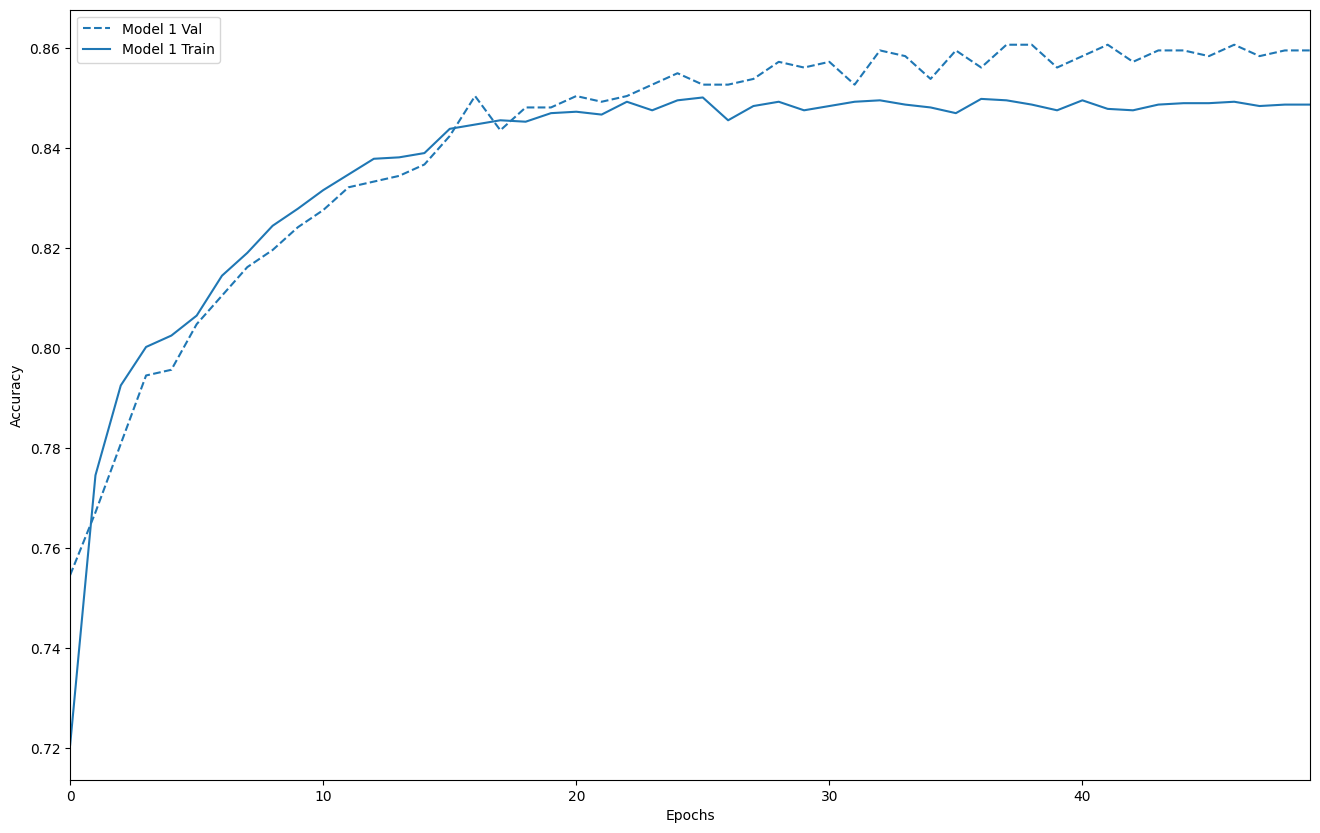

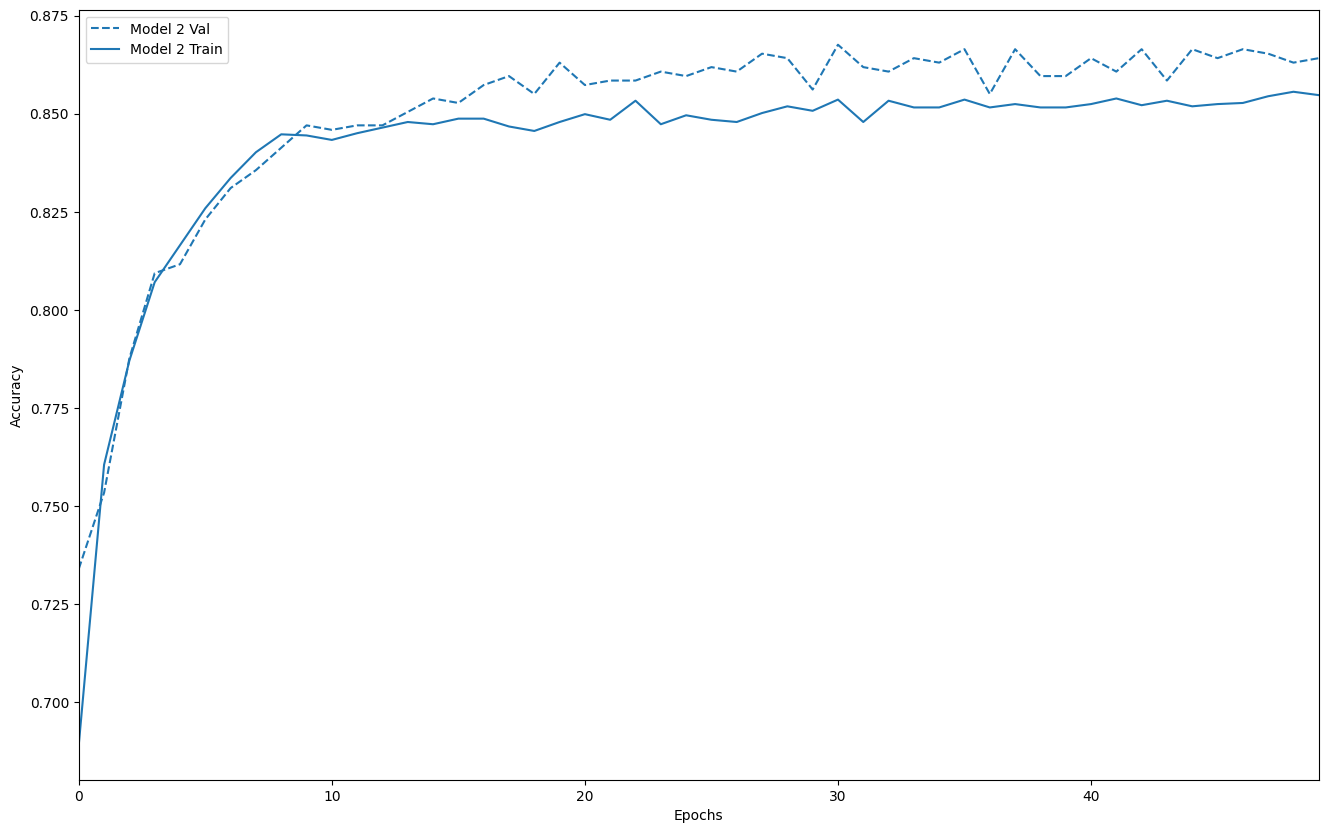

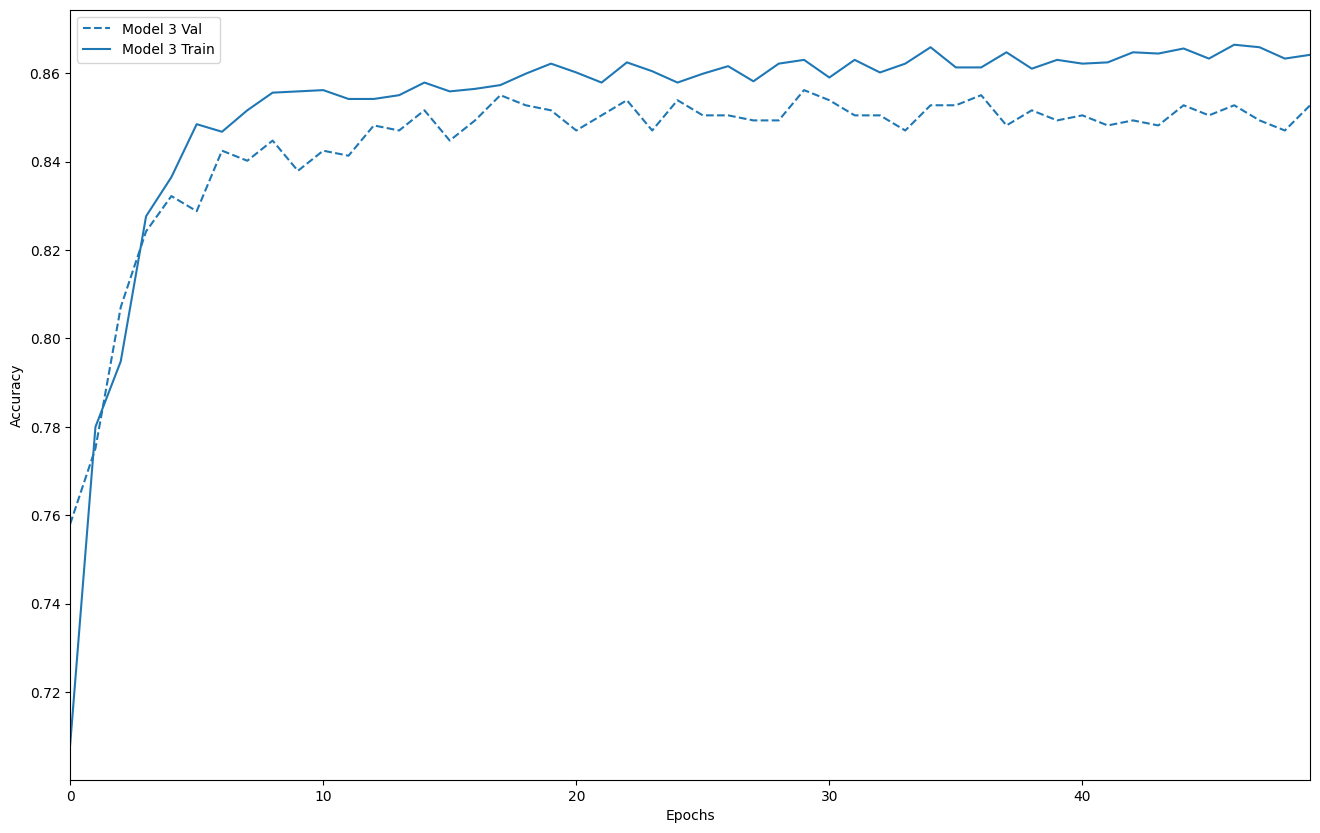

In [17]:
import matplotlib.pyplot as plt

def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0, max(history.epoch)])


plot_history([('model 1', history_1)])
plot_history([('model 2', history_2)])
plot_history([('model 3', history_3)])
